In [13]:
import numpy as np
import matplotlib.pyplot as plt

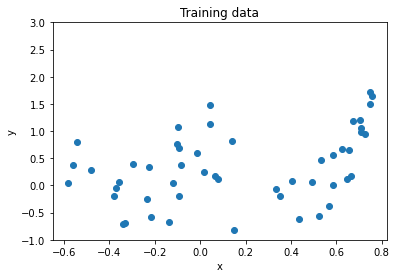

In [14]:
x_train, x_val, y_train, y_val = np.load("./data_regression.npy")
plt.plot(x_train,y_train,'o') ## YOUR CODE HERE
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.ylim([-1,3])
plt.show()

In [15]:
# Create polynomial features for the training set
def get_polynomial_features(x,degree): 
    z=np.zeros((x.shape[0],degree+1))
    c_0=np.ones((x.shape[0],))
    for i in range(degree+1):
        if i==0:
            z[:,i]=c_0
        else:
            z[:,i]=x**i
    return z 

    

# get polynomial features
X_train = get_polynomial_features(x_train,degree=5)
print(X_train)

[[ 1.00000000e+00  7.28003710e-01  5.29989401e-01  3.85834250e-01
   2.80888766e-01  2.04488063e-01]
 [ 1.00000000e+00 -1.29624994e-02  1.68026391e-04 -2.17804200e-06
   2.82328681e-08 -3.65968537e-10]
 [ 1.00000000e+00 -9.43190714e-02  8.89608722e-03 -8.39070685e-04
   7.91403679e-05 -7.46444600e-06]
 [ 1.00000000e+00 -8.49688288e-02  7.21970187e-03 -6.13449612e-04
   5.21240951e-05 -4.42892331e-06]
 [ 1.00000000e+00  4.33636909e-01  1.88040969e-01  8.15415044e-02
   3.53594059e-02  1.53331435e-02]
 [ 1.00000000e+00  3.49523039e-01  1.22166355e-01  4.26999558e-02
   1.49246183e-02  5.21649796e-03]
 [ 1.00000000e+00  1.39439060e-01  1.94432516e-02  2.71114873e-03
   3.78040032e-04  5.27135469e-05]
 [ 1.00000000e+00 -9.71774884e-02  9.44346426e-03 -9.17692138e-04
   8.91790172e-05 -8.66619291e-06]
 [ 1.00000000e+00 -3.56740195e-01  1.27263566e-01 -4.54000294e-02
   1.61960153e-02 -5.77776966e-03]
 [ 1.00000000e+00  1.75038238e-02  3.06383849e-04  5.36288893e-06
   9.38710631e-08  1.6431

In [16]:
# Randomly initialize a set of model parameters
def initialize_parameters(n):
    t=np.random.rand(n,)
    return t



# initialize theta
theta = initialize_parameters(X_train.shape[1])
print(theta)

[0.01988013 0.02621099 0.02830649 0.24621107 0.86002795 0.53883106]


In [17]:
# Calculate mean squared error
def ms_error(X, theta, y):
    e=y-np.dot(X,theta)
    ms_e=1/(2*X.shape[0])*np.dot(e.T,e)
    return ms_e


print(ms_error(X_train, theta, y_train))

0.17942736819297955


In [18]:
# Calculate average gradient across all the training samples
def grad(X, theta, Y):
    X1=np.dot(X.T,X)
    gd=1/(2*X.shape[0])*(-2*np.dot(Y.T,X)+2*np.dot(theta.T,X1))
    return gd


print(grad(X_train, theta, y_train))

[-0.19392333 -0.07174855 -0.06468183 -0.04234899 -0.03603923 -0.02412258]


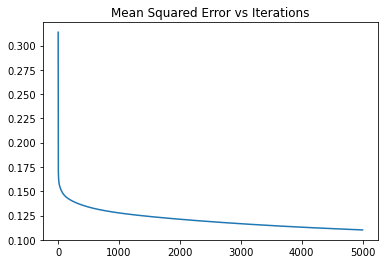

New Theta: 
 [ 0.2575851  -0.04195703 -2.85421253 -1.05553634  7.79695615  3.53038914]

Final Mean Squared Error: 
 0.11016169282264622


In [19]:
# Perform batch gradient descent, return a new set of parameters
# iterations: times of iteration
# learning rate: a hyperparameter
def batch_descent(X, Y, iterations, learning_rate):
    l = np.zeros((iterations,))
    theta = initialize_parameters(X.shape[1])
    for i in range(iterations):
        l[i]=ms_error(X,theta,Y)
        theta=theta-learning_rate*(grad(X,theta,Y).T)
    return theta, l




new_theta, L = batch_descent(X_train, y_train, 5000, 0.5)
plt.plot(L)
plt.title('Mean Squared Error vs Iterations')
plt.show()
print('New Theta: \n', new_theta)
print('\nFinal Mean Squared Error: \n', ms_error(X_train, new_theta, y_train))

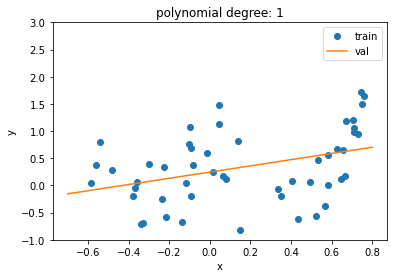

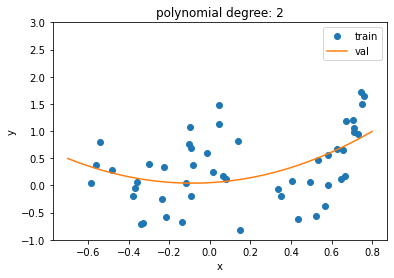

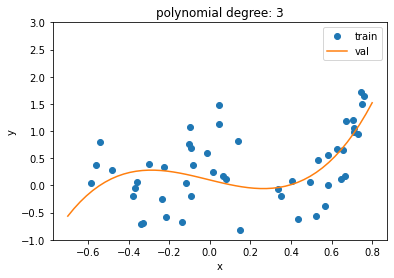

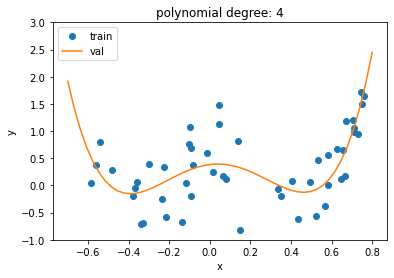

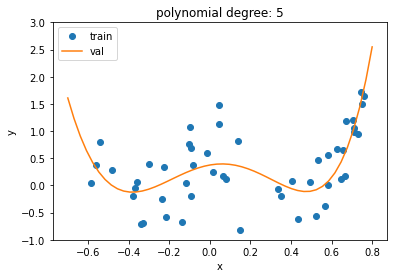

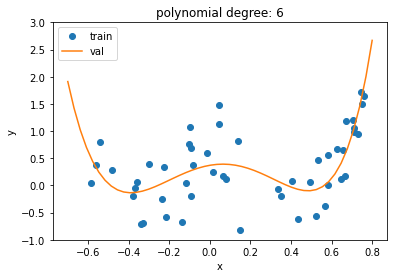

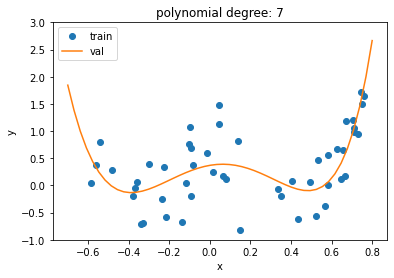

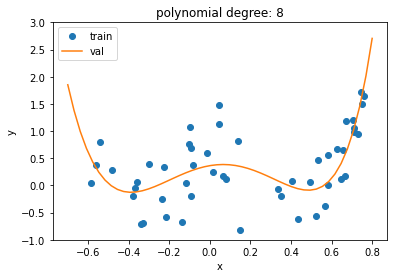

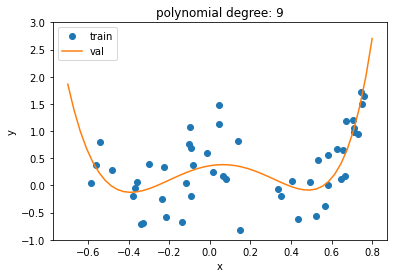

In [20]:
# Visualize the prediction curves for different choice of degree of polynomial features
def get_theta(X,y):
    # YOUR CODE HERE
    th,L=batch_descent(X,y,learning_rate=0.5,iterations=20000) # use gradient descent to get theta, iterate 20000 times
    return th


def get_prediction(X,theta):
    # YOUR CODE HERE
    pred=np.dot(X,theta)
    return pred


for degree in range(1,10):
    # prepare train/val data
    X_train = get_polynomial_features(x_train,degree=degree)
    x_val = np.linspace(-0.7, 0.8, x_val.shape[0])
    X_val = get_polynomial_features(x_val,degree=degree)
    
    # get theta
    theta = get_theta(X_train,y_train)
    
    # compute predictions on train/val set
    pred_y_train = get_prediction(X_train,theta)
    pred_y_val = get_prediction(X_val,theta)
    
    # plot results
    plt.plot(x_train,y_train,'o',label='train')
    plt.plot(x_val,pred_y_val,label='val')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("polynomial degree: {}".format(degree))
    plt.ylim([-1,3])
    plt.show()

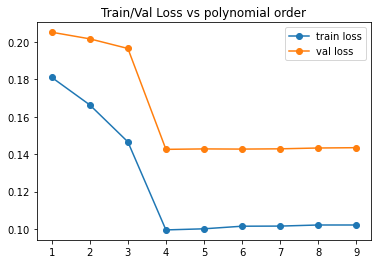

In [21]:
# Draw the train, test loss curves for polynomials of different degrees
x_train, x_val, y_train, y_val = np.load("./data_regression.npy")
# store train/test loss values
train_loss,val_loss = [],[]

for degree in range(1,10):
    # prepare train/val data
    X_train = get_polynomial_features(x_train,degree=degree)   # YOUR CODE HERE
    X_val = get_polynomial_features(x_val,degree=degree)     # YOUR CODE HERE

    # get theta
    theta = get_theta(X_train,y_train)
    
    # compute train/val losses
    train_loss.append(ms_error(X_train, theta, y_train))
    val_loss.append(ms_error(X_val, theta, y_val))
    

plt.plot(range(1,10),train_loss,'-o',label='train loss')
plt.plot(range(1,10),val_loss,'-o',label='val loss')
plt.xticks(range(1,10))
plt.legend()
plt.title('Train/Val Loss vs polynomial order')
plt.show()